# 特徵值的影響

我們來看一下特徵值有什麼幾何上的意義。也就是一個由矩陣 $A$ 定義出來的線性轉換, 我們由特徵值和特徵向量能不能看出對整個定義域上的點做了什麼事?

## 1. 讀入套件和耍寶技巧

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

我們介紹個耍寶技巧, 在 Jupyter Notebook 要用希臘字母, 例如 $\alpha$ 
做變數, 只要打入 (和 LaTeX 一樣):

    \alpha
 
然後立刻按 `Tab` 鍵。接著當場看到 $\alpha$ 出現!

In [2]:
α = 3

真的可以用哦。

In [39]:
α*5

15

## 2. 畫個圓

畫個圓其實就是把點點出, 再連起來, 和以前一樣! 我們用極座標找出圓的參數式會方便一點。

![極座標](images/polar.png)

In [41]:
θ = np.linspace(0, 2*np.pi, 200)

In [42]:
r = 1

x = r*np.cos(θ)
y = r*np.sin(θ)

一些小細節解釋, 要顯示正圓, 我們要把 x, y 軸比例設一樣的。然後我們設定 x, y 範圍都是 -10 到 10。

![matplotlib 圖的結構](images/figure.png)

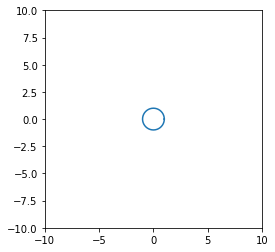

In [43]:
ax = plt.gca()
ax.set_aspect('equal')

plt.xlim(-10,10)
plt.ylim(-10,10)

plt.plot(x,y)

## 3.  矩陣乘法

我們現在想要一個 eigenvalues 分別為 10, 1 的矩陣。最簡單的大概就是:

$$A = \begin{bmatrix} 10 & 0 \\ 0 & 1 \end{bmatrix}$$

In [44]:
A = np.array([[10,0],[0,1]])

In [45]:
A

array([[10,  0],
       [ 0,  1]])

矩陣純量乘法。

In [46]:
3*A

array([[30,  0],
       [ 0,  3]])

這個其實是 array 的 broadcasting 的動作!

![broadcasting](images/broadcasting.png)

再來我們令一個 $B$ 矩陣, 來計算兩個矩陣相乘。

In [47]:
B = np.array([[1,2],[3,4]])

In [48]:
B

array([[1, 2],
       [3, 4]])

相乘其實是用 dot product 的指令! (為什麼請好好參一下)

In [49]:
np.dot(A,B)

array([[10, 20],
       [ 3,  4]])

新式的做法是

    A@B

In [51]:
A@B

array([[10, 20],
       [ 3,  4]])

## 4. 矩陣乘上一個向量

因為我們線性代數太常用這個動作, 所以好好解說一下。假設我們有

$$\mathbf{u} = \begin{bmatrix}1 \\ 7\end{bmatrix}$$

我們要計算

$$A\mathbf{u}$$

照說我應該這樣令 $\mathbf{u}$。

In [22]:
u = np.array([[1],[7]])

In [23]:
A@u

array([[10],
       [ 7]])

真的也是這樣, 不過其實我們可以用更簡單的手法做到, 請看:

In [52]:
v=np.array([1,7])

In [53]:
A@v

array([10,  7])

這是為什麼呢? 原因請參一下, 就記得 broadcasting 這件事。

## 5. A 會把單位圓映成什麼

還記得我們的 x, y 是單位圓的座標嗎? 我們的 A 會把它映到什麼呢?

In [54]:
xy = A@np.array([x,y])

我們來比較原本的圓, 和被 A 轉換過去的結果。我們用了 `subplot` 這個多圖放一起的技巧。基本上這是 copy paste 的碼, 所以看來很白痴。

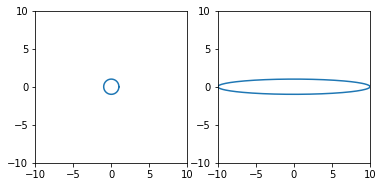

In [55]:
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_aspect('equal')

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(x,y)

#
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_aspect('equal')

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xy[0], xy[1])

## 6. 如果換成資料點

我們在數據分析, 如果有資料 $(x,y)$, 兩個變數都是由標準常態分布來的。

In [30]:
x = np.random.randn(100)
y = np.random.randn(100)

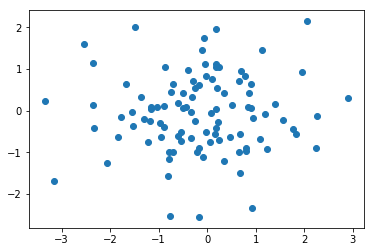

In [31]:
plt.scatter(x,y)

是否可以看一下剛剛的 A 對這資料的影響?

In [32]:
xy = A@np.array([x,y])

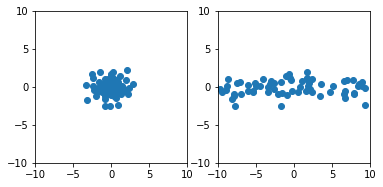

In [33]:
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_aspect('equal')

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(x,y)

#
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_aspect('equal')

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(xy[0], xy[1])

假設右邊的才是我們的數據, 我們會發現 x (eigenvalue 大的那個方向) 是重點方向。也就是如果我們需要減少一個變數, 保留 x 會是比較好的。 

## 7. 極座標其實可以有很多變化

本節純耍寶...

In [57]:
r = 1-np.sin(θ)

x = r*np.cos(θ)
y = r*np.sin(θ)

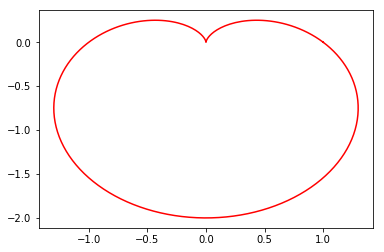

In [58]:
plt.plot(x,y,'r')

## [作業] 

1. 請畫出一個圖形 (比如說單位圓)。
2. 決定兩個方向 (找兩個向量), 不可以是 x 軸, y 軸的方向。
3. 決定兩個方向各自的 eigenvalue。
4. 找出符合條件的矩陣 A。
5. 求以 A 決定的線性轉換, 會把 1. 的